In [21]:
import numpy as np
import scipy 
import glob
import cv2

In [55]:
arr = np.ones((20, 20))
points1 = np.array([[5, 5], [5, 10], [10, 10], [10, 5]])

In [9]:
import matplotlib.pyplot as plt
for simplex in hull.vertices:
    print(simplex)

1
0
3
2


In [41]:
raw_paths = glob.glob('/Users/patricknaylor/Desktop/Field_Detection/Images/Raw/*')
image = cv2.imread(raw_paths[0])

In [26]:
print(image.shape)

(720, 1280, 3)


In [31]:
def fill_hull(image, points):

    hull = scipy.spatial.ConvexHull(points)
    deln = scipy.spatial.Delaunay(points[hull.vertices])

    # Instead of allocating a giant array for all indices in the volume,
    # just iterate over the slices one at a time.
    idx_2d = np.indices(image.shape[1:], np.int16)
    idx_2d = np.moveaxis(idx_2d, 0, -1)

    idx_3d = np.zeros((*image.shape[1:], image.ndim), np.int16)
    idx_3d[:, :, 1:] = idx_2d
    
    mask = np.zeros_like(image, dtype=bool)
    for z in range(len(image)):
        idx_3d[:,:,0] = z
        s = deln.find_simplex(idx_3d)
        mask[z, (s != -1)] = 1

    return mask

In [43]:
def flood_fill_hull(image,points):    
    #points = np.transpose(np.where(image))
    hull = scipy.spatial.ConvexHull(points)
    deln = scipy.spatial.Delaunay(points[hull.vertices]) 
    idx = np.stack(np.indices(image.shape), axis = -1)
    out_idx = np.nonzero(deln.find_simplex(idx) + 1)
    out_img = np.zeros(image.shape)
    out_img[out_idx] = 1
    return out_img, hull

In [49]:
out, h = flood_fill_hull(image, points)
print(np.shape(image))

ValueError: wrong dimensionality in xi

In [48]:

print(np.shape(out))

(100, 100, 100)


In [73]:


def flood_fill_hull(image, points):    
    #points = np.transpose(np.where(image))
    hull = scipy.spatial.ConvexHull(points)
    deln = scipy.spatial.Delaunay(points[hull.vertices]) 
    idx = np.stack(np.indices(image.shape), axis = -1)
    out_idx = np.nonzero(deln.find_simplex(idx) + 1)
    out_img = np.zeros(image.shape)
    out_img[out_idx] = 1
    return out_img, hull

In [85]:
points = np.array([[0, 100], [100, 50], [500, 80], [700, 10]])
raw_paths = glob.glob('/Users/patricknaylor/Desktop/Field_Detection/Images/Raw/*')
image = cv2.imread(raw_paths[0])



out, h = flood_fill_hull(image[:, :, 0], points)
print(np.shape(out))

(720, 1280)


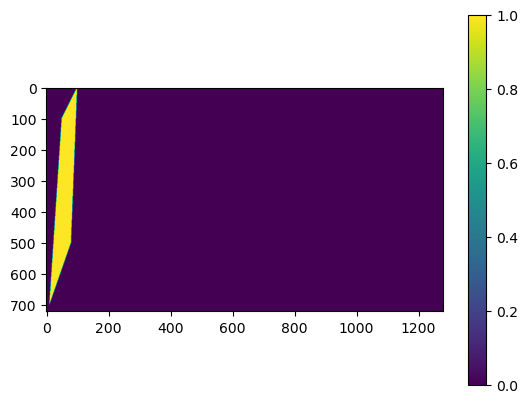

In [86]:
plt.imshow(out[:, :])
plt.colorbar()